In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-02-25 / Aki Taanila


# Keskiarvoja pylväinä

Tässä muistiossa käytän **seaborn**-funktioita **barplot** ja **catplot**.

Kaavioiden muotoiluun käytän **matplotlib.pyplot**-funktioita. Jos kaipaat lisää muotoiluja, niin lue https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tyylimäärittely
sns.set_style('whitegrid')

# Tietoja pingviineistä
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Useiden muuttujien keskiarvot

**barplot** esittää keskiarvoja pylväskaaviona. Pylvään päässä näkyvä viiva kuvaa keskiarvon 95 % luottamusväliä.

**orient**-parametrilla voin vaihtaa pystypylväskaavion vaakapylväskaavioksi.

Lisätietoa https://seaborn.pydata.org/generated/seaborn.barplot.html

Text(0.5, 0, 'Keskiarvo')

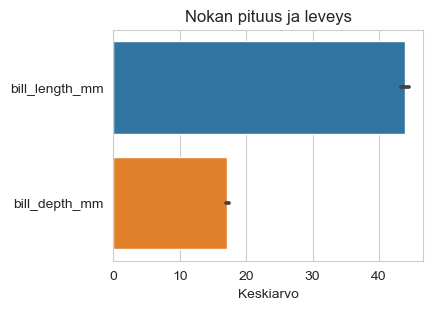

In [3]:
plt.figure(figsize=(4, 3))
sns.barplot(data=penguins[['bill_length_mm', 'bill_depth_mm']], orient='h')

plt.title('Nokan pituus ja leveys')
plt.xlabel('Keskiarvo')

## Muuttujan keskiarvot kategorisen määrittämissä ryhmissä

Text(0, 0.5, 'Keskiarvo')

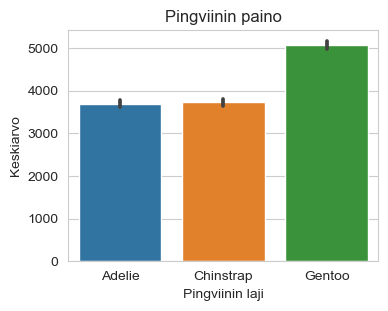

In [4]:
plt.figure(figsize=(4, 3))
sns.barplot(data=penguins, x='species', y='body_mass_g')

plt.title('Pingviinin paino')
plt.xlabel('Pingviinin laji')
plt.ylabel('Keskiarvo')

**hue**-parametrin avulla voin tarkastella frekvenssijakaumaa toisen kategorisen muuttujan määrittämissä ryhmissä.

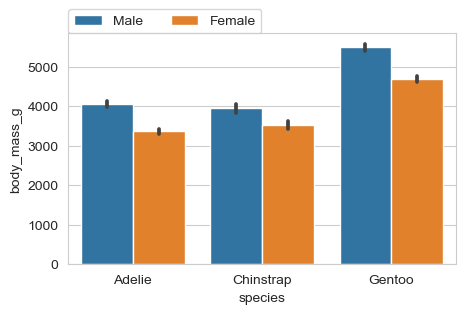

In [5]:
plt.figure(figsize=(5, 3))
sns.barplot(data=penguins, x='species', y='body_mass_g', hue='sex')

plt.legend(loc=(0, 1), ncol=2)

## catplot

**catplot** mahdollistaa kategorisen muuttujan frekvenssijakauman tarkastelun muiden kategoristen muuttujien määrittämissä ryhmissä. **kind**-parametrin arvo **'bar'** määrittää että kaaviolajina on **barplot**.

Seuraavassa tarkastelen pingviinien painon keskiarvoja alalajin (**species**) määrittämissä ryhmissä.

Lisätietoa https://seaborn.pydata.org/generated/seaborn.catplot.html

**catplot** tuottaa **Facetgrid**-olion, jolla on omat funktionsa otsikointien ym. ominaisuuksien muotoiluun.
Lisätietoa https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

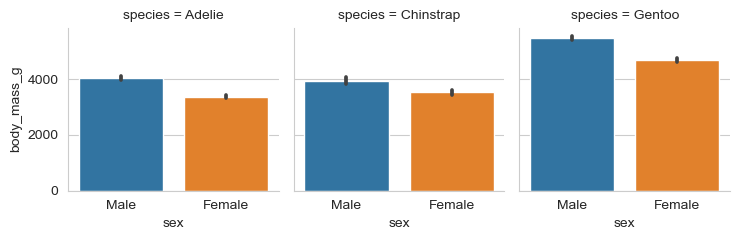

In [6]:
g = sns.catplot(data=penguins, x='sex', y='body_mass_g', col='species', kind='bar', height=2.5)

## N-arvot!

Keskiarvon laskennassa mukana olleiden arvojen lukumäärä täytyy aina keskiarvoja käytettäessä laskea ja keskiarvoja raportoitaessa n-arvojen täytyy olla näkyvillä. Pienten n-arvojen kohdalla keskiarvoihin täytyy suhtautua varoen.

N-arvot voin selvittää **pandas**-funktiolla **count**. Seuraavassa muutama esimerkki.

In [7]:
# Yksittäisten muuttujien n-arvot
penguins.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [8]:
# Muuttujien n-arvot alalajin mukaan
penguins.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


In [9]:
# Muuttujien n-arvot alalajin ja sukupuolen mukaan
penguins.groupby(['species', 'sex']).count()

island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex                                                                
Adelie    Female      73              73             73                 73   
          Male        73              73             73                 73   
Chinstrap Female      34              34             34                 34   
          Male        34              34             34                 34   
Gentoo    Female      58              58             58                 58   
          Male        61              61             61                 61   

                  body_mass_g  
species   sex                  
Adelie    Female           73  
          Male             73  
Chinstrap Female           34  
          Male             34  
Gentoo    Female           58  
          Male             61